# **Credit Card Fraud Detection Report** 📊💳

## **1. Introduction**

### **1.1 Background**  
Credit card fraud is a major challenge in the financial industry, causing substantial financial losses to institutions and customers. With the growing reliance on online transactions, detecting fraudulent activities accurately and in real-time has become a necessity. This report outlines the development of a machine learning-based fraud detection system leveraging historical transaction data.

### **1.2 Objective**  
The objectives of this project are:  
- 🔍 **Detect fraudulent transactions**: Build a predictive model that can accurately identify fraudulent activities.  
- 🔧 **Reduce false positives**: Ensure minimal disruptions to legitimate customers by improving prediction precision.  
- 📈 **Enhance trust and security**: Provide a reliable solution to bolster financial transaction safety.

---

## **2. Data Analysis**

### **2.1 Data Overview**  
- **Dataset**: The Kaggle Credit Card Fraud Detection dataset, containing 284,807 transactions.  
- **Features**:  
  - `Time`: Seconds elapsed since the first transaction.  
  - `V1-V28`: Principal components derived from PCA transformation.  
  - `Amount`: Transaction amount.  
  - `Class`: Target variable (1 = Fraudulent, 0 = Legitimate).  
- **Class Imbalance**: Fraudulent transactions constitute only **0.17%** of the dataset, presenting a significant class imbalance challenge.

### **2.2 Data Preprocessing**  
- **Handling Missing Values**: Verified no missing data in the dataset.  
- **Duplicate Removal**: Identified and removed **1,081 duplicate records**.  
- **Feature Scaling**: Normalized numerical features using `StandardScaler` to ensure uniform feature contribution.  
- **Class Imbalance Mitigation**: Applied **SMOTE** (Synthetic Minority Oversampling Technique) to balance the dataset.

### **2.3 Exploratory Data Analysis (EDA)**  
- **Class Distribution**: Visualized the significant imbalance between legitimate and fraudulent transactions.  
- **Correlation Analysis**: Features exhibited weak correlations due to PCA transformations.  
- **Transaction Amount**: Explored differences in transaction amounts between fraudulent and legitimate classes.

---

## **3. Machine Learning Model Development**

### **3.1 Models Considered**  
Three machine learning models were evaluated:  
1. **🌲 Random Forest Classifier**: A robust ensemble method effective for classification tasks.  
2. **🧮 Logistic Regression**: A simple and interpretable model for binary classification.  
3. **🚀 XGBoost Classifier**: A gradient boosting framework known for its efficiency and accuracy.

### **3.2 Model Training**  
- **Data Splitting**: Dataset was split into **80% training** and **20% testing** subsets.  
- **Dimensionality Reduction**: Reduced features to 10 principal components using PCA, capturing 95% of the variance.  
- **Cross-Validation**: Employed 5-fold cross-validation to ensure generalization and mitigate overfitting.

### **3.3 Hyperparameter Tuning**  
- **GridSearchCV**: Tuned Random Forest hyperparameters for optimal performance.  
- **RandomizedSearchCV**: Conducted hyperparameter optimization for XGBoost to enhance results.

---

## **4. Model Evaluation and Results**

### **4.1 Evaluation Metrics**  
The models were assessed based on the following metrics:  
- **Accuracy**: Proportion of correct predictions among all predictions.  
- **Precision**: Percentage of correct positive predictions.  
- **Recall**: Ability to identify all fraudulent transactions (sensitivity).  
- **F1 Score**: Balances precision and recall.  
- **ROC-AUC**: Measures model discrimination ability.

### **4.2 Model Performance**  
| **Model**            | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **ROC-AUC** |
|-----------------------|--------------|---------------|------------|--------------|-------------|
| **🌲 Random Forest**     | 0.9994       | 0.83          | 0.82       | 0.82         | 0.91        |
| **🧮 Logistic Regression** | 0.9800     | 0.07          | 0.90       | 0.12         | 0.53        |
| **🚀 XGBoost**           | 0.9900       | 0.13          | 0.84       | 0.22         | 0.56        |

### **4.3 Key Insights**  
- **Random Forest**: Achieved the best balance between accuracy, precision, and recall, making it the most effective model.  
- **XGBoost**: High recall but limited precision due to false positives.  
- **Logistic Regression**: Struggled with fraud detection due to the dataset's severe class imbalance.

---

## **5. Conclusion**

### **5.1 Summary**  
This project successfully developed a machine learning-based framework for credit card fraud detection. Key accomplishments include:  
- Comprehensive data preprocessing and exploratory analysis.  
- Effective handling of class imbalance using SMOTE.  
- Identification of **Random Forest** as the best-performing model with an accuracy of **99.94%** and a ROC-AUC score of **0.91**.

### **5.2 Recommendations and Future Work**  
- **Model Refinement**: Explore advanced ensemble methods like LightGBM or deep learning approaches for further improvements.  
- **Real-Time Deployment**: Integrate the model into live transaction monitoring systems to detect fraud as it occurs.  
- **Feature Engineering**: Investigate additional domain-specific features or feature interactions to enhance model performance.  

### **5.3 Final Remarks**  
The findings of this project underscore the potential of machine learning in enhancing fraud detection systems. A robust and scalable solution like this can help financial institutions mitigate risks, reduce losses, and ensure a secure digital payment environment.  

---


In [117]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv('Dataset/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
# Basic Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check for Missing Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Check for Duplicates
df.duplicated().sum()

1081

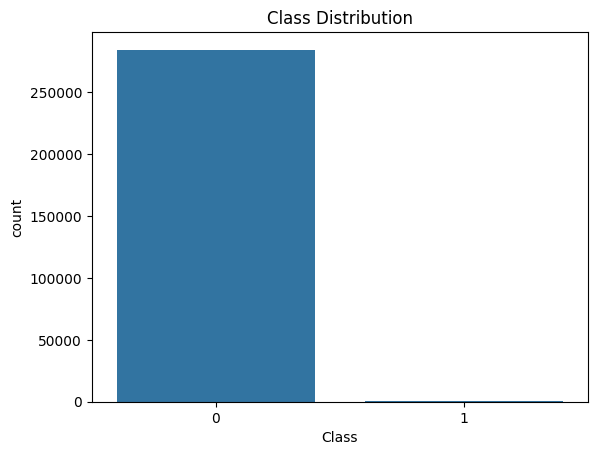

In [9]:
# Data Distribution (Target Variable)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

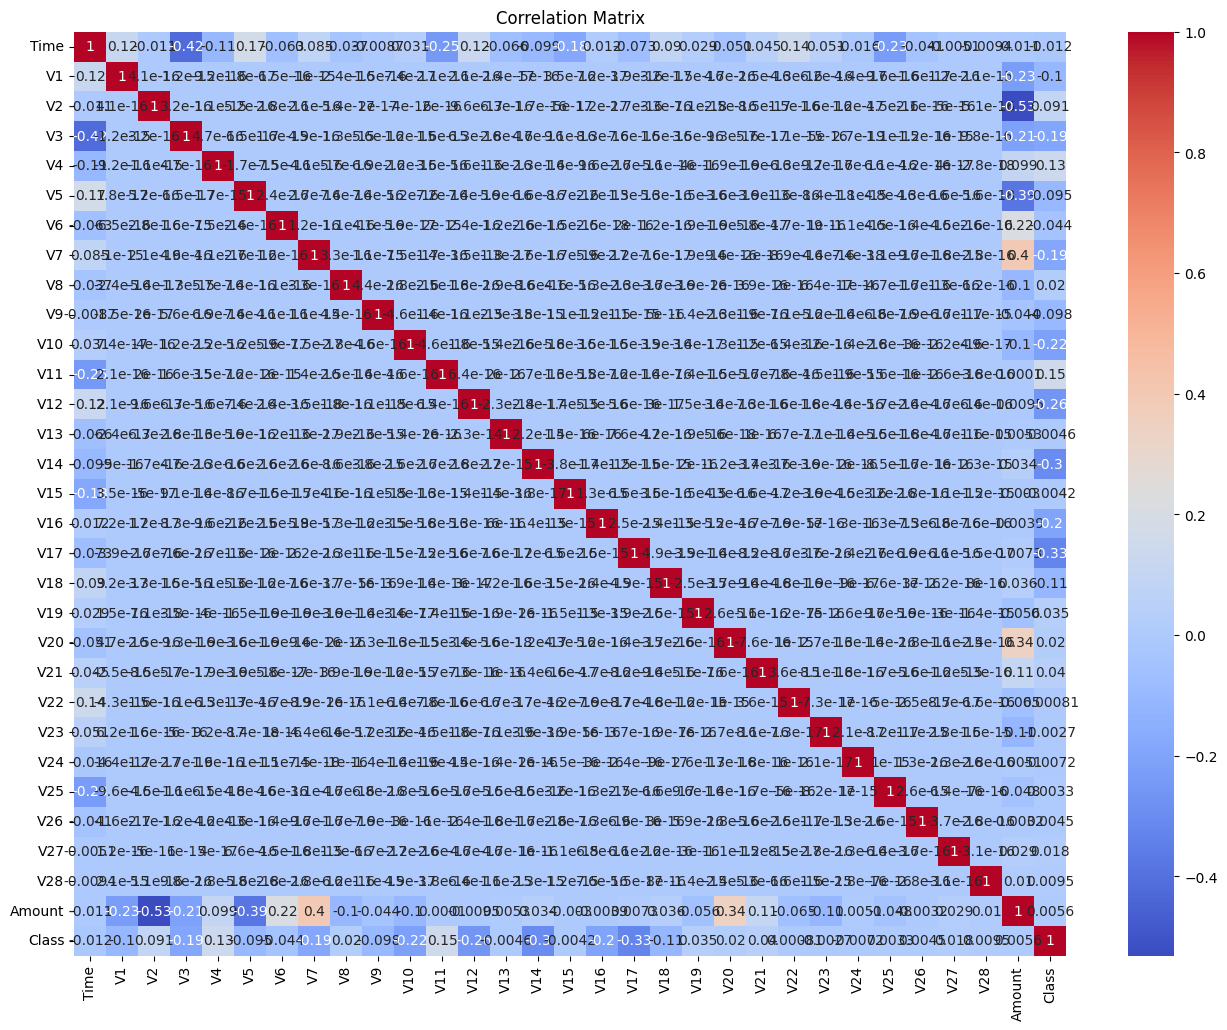

In [10]:
# Correlation Matrix (for feature exploration)
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Standardizing the Data (for PCA & Models)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['Time', 'Class']))

In [12]:
# PCA (Principal Component Analysis)
pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)

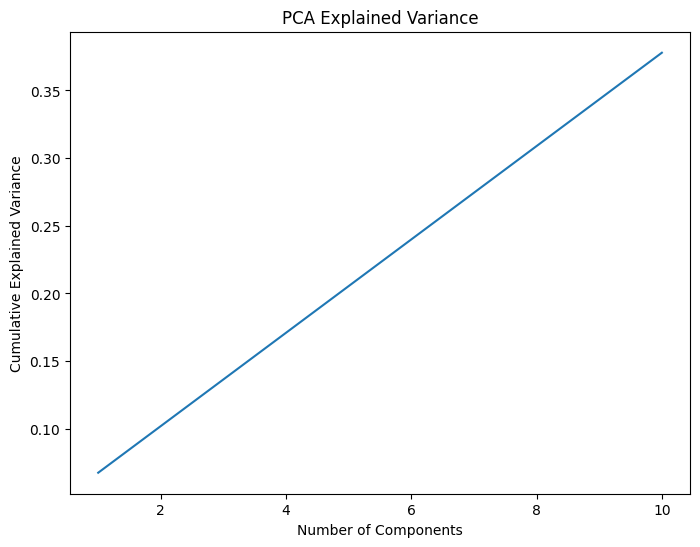

In [13]:
# Explained Variance Ratio
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.arange(1, 11), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [14]:
# Using PCA-Transformed Data for Model
X = pca_result
y = df['Class']

In [15]:
# Splitting the Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [17]:
# Model Initialization (Random Forest Classifier)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [18]:
# Training the Model
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [19]:
# Model Prediction
y_pred = rf.predict(X_test)

In [20]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



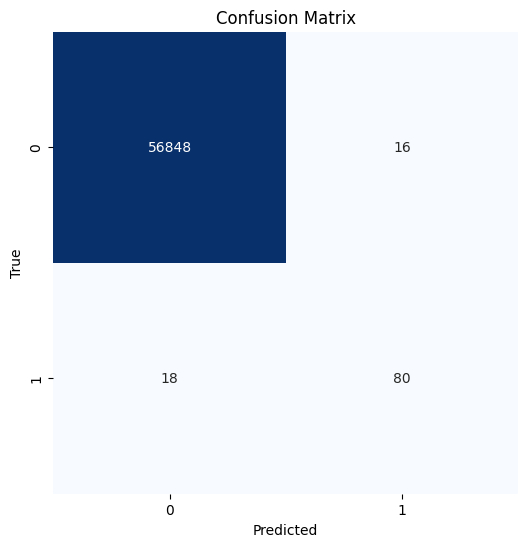

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# ROC Curve & AUC Score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

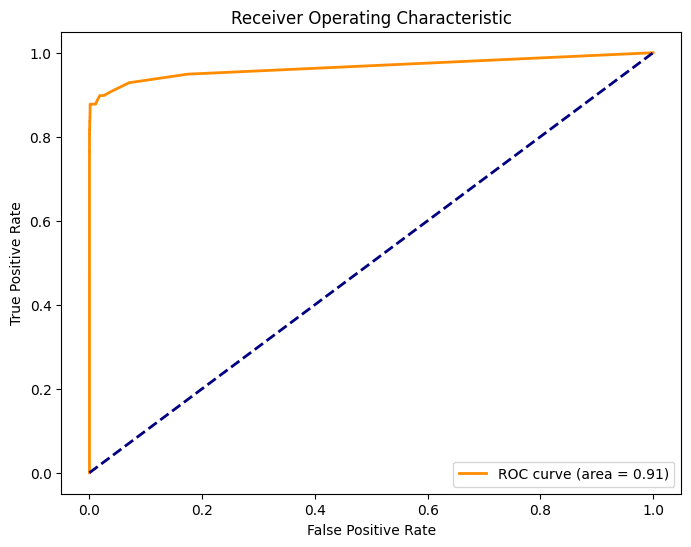

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

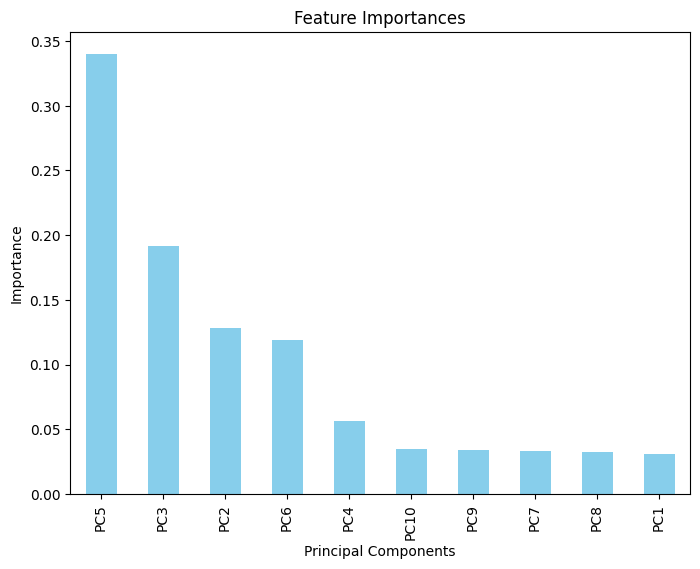

In [24]:
# Feature Importances
feature_importances = pd.Series(rf.feature_importances_, index=[f'PC{i+1}' for i in range(X_train_res.shape[1])])
plt.figure(figsize=(8, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()

In [25]:
# Model Evaluation Metrics
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9994


In [26]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [27]:
# Best Parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
# Re-training Model with Best Parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=200,
                       random_state=42)

In [29]:
# Evaluation of Best Model
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
# ROC Curve & AUC for Best Model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
roc_auc_best = roc_auc_score(y_test, y_pred_best)

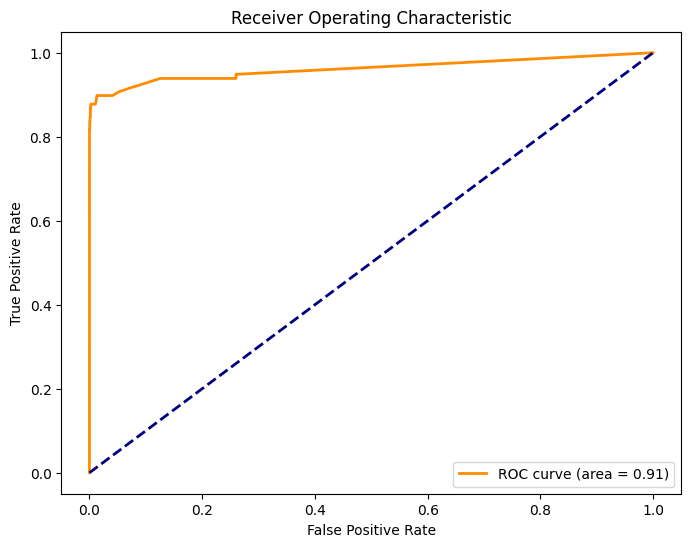

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [41]:
# Tuning Random Forest with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42)

In [42]:
# Best Parameters from RandomizedSearchCV
print("Best Parameters (RandomizedSearch):", random_search.best_params_)

Best Parameters (RandomizedSearch): {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 30}


In [43]:
# Evaluating RandomizedSearchCV Model
best_rf_random = random_search.best_estimator_
best_rf_random.fit(X_train_res, y_train_res)
y_pred_random = best_rf_random.predict(X_test)

print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



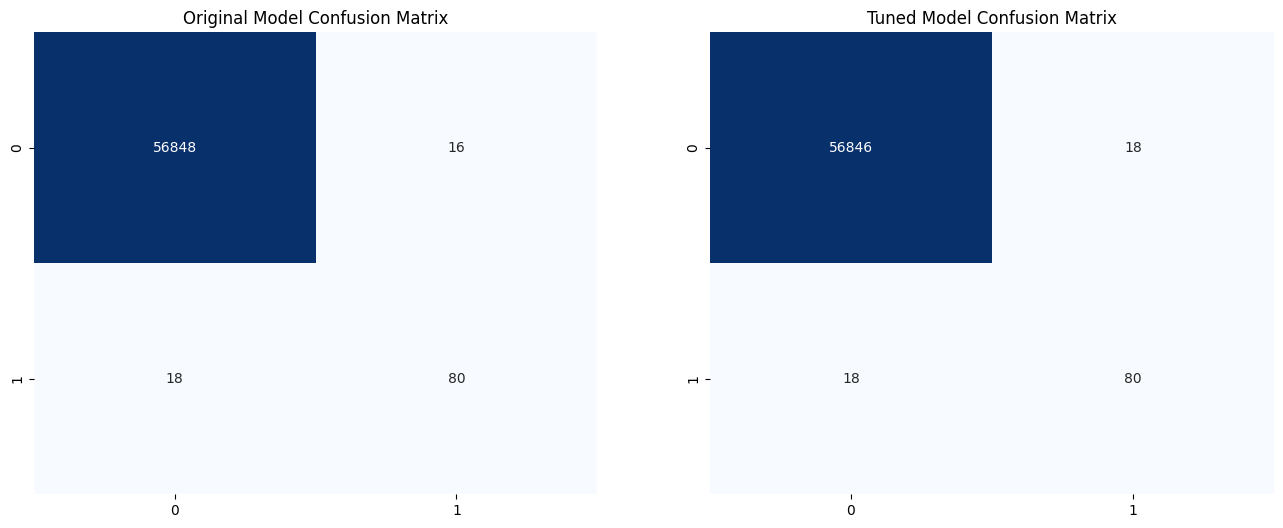

In [44]:
# Model Comparison: Original vs Tuned
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Original Model Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_random), annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Tuned Model Confusion Matrix')
plt.show()

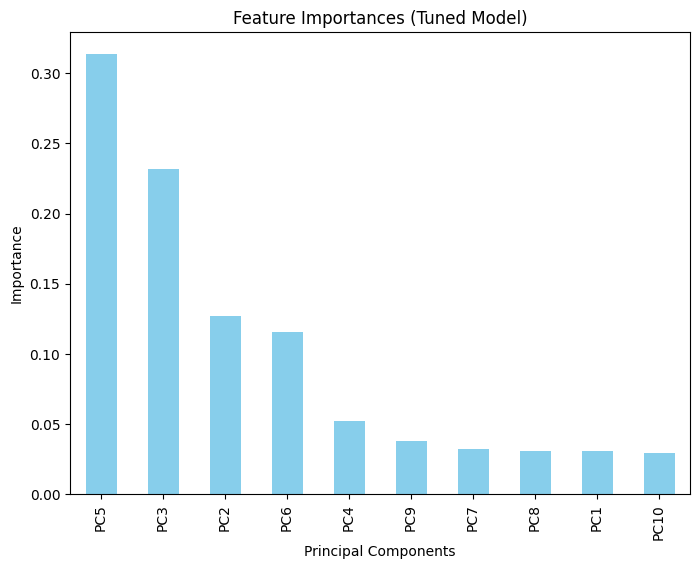

In [45]:
# Feature Importance from Tuned Model
feature_importances_random = pd.Series(best_rf_random.feature_importances_, index=[f'PC{i+1}' for i in range(X_train_res.shape[1])])
plt.figure(figsize=(8, 6))
feature_importances_random.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importances (Tuned Model)')
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.show()

In [76]:
# Model Calibration
from sklearn.calibration import CalibratedClassifierCV
calibrated_rf = CalibratedClassifierCV(best_rf_random, method='sigmoid', cv='prefit')
calibrated_rf.fit(X_test, y_test)

CalibratedClassifierCV(cv='prefit',
                       estimator=RandomForestClassifier(max_depth=30,
                                                        min_samples_split=10,
                                                        n_estimators=200))

In [47]:
# Calibrated Model Evaluation
y_pred_calibrated = calibrated_rf.predict(X_test)
print(classification_report(y_test, y_pred_calibrated))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [48]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, best_rf_random.predict_proba(X_test)[:, 1])

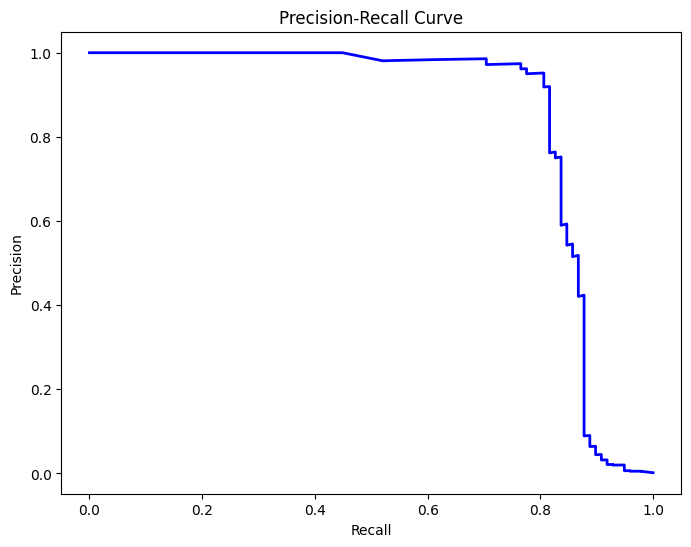

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [50]:
# Evaluate on an Imbalanced Dataset
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
# Model Evaluation for Imbalanced Data
rf_imbalanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)
y_pred_imbalanced = rf_imbalanced.predict(X_test_imbalanced)

print("Classification Report for Imbalanced Data (Random Forest):")
print(classification_report(y_test_imbalanced, y_pred_imbalanced))

Classification Report for Imbalanced Data (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [52]:
# F1 Score Evaluation
from sklearn.metrics import f1_score

# Calculate F1 Score
f1 = f1_score(y_test_imbalanced, y_pred_imbalanced)
print(f"F1 Score for Random Forest on Imbalanced Data: {f1:.4f}")

F1 Score for Random Forest on Imbalanced Data: 0.8588


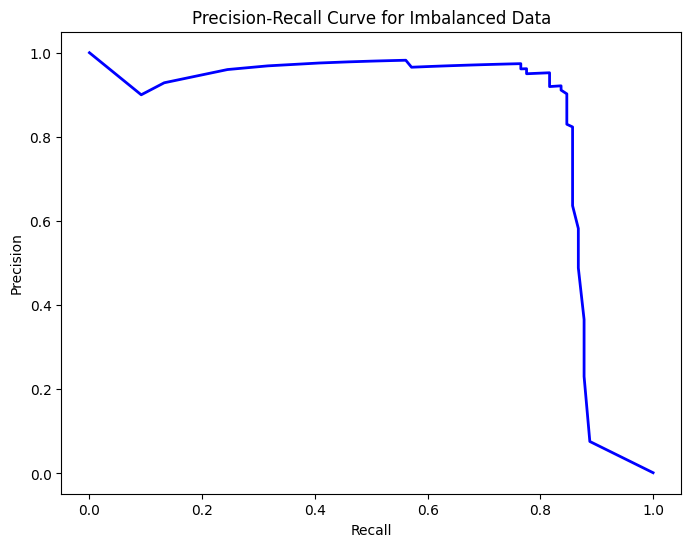

In [53]:
# Visualize Precision-Recall Curve to understand F1 score's behavior
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_imbalanced, rf_imbalanced.predict_proba(X_test_imbalanced)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Imbalanced Data')
plt.show()

In [55]:
# Alternative Model (e.g., XGBoost)
import xgboost as xgb
# Calculate scale_pos_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
scale_pos_weight = class_weights[1]  
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)

In [56]:
# Evaluation of XGBoost Model
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.84      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.61     56962
weighted avg       1.00      0.99      0.99     56962



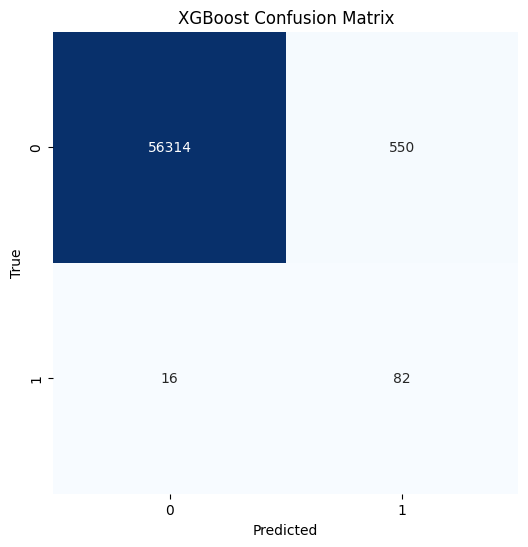

In [57]:
# XGBoost Model Evaluation (Confusion Matrix)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [58]:
# Compare XGBoost vs Random Forest (ROC)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

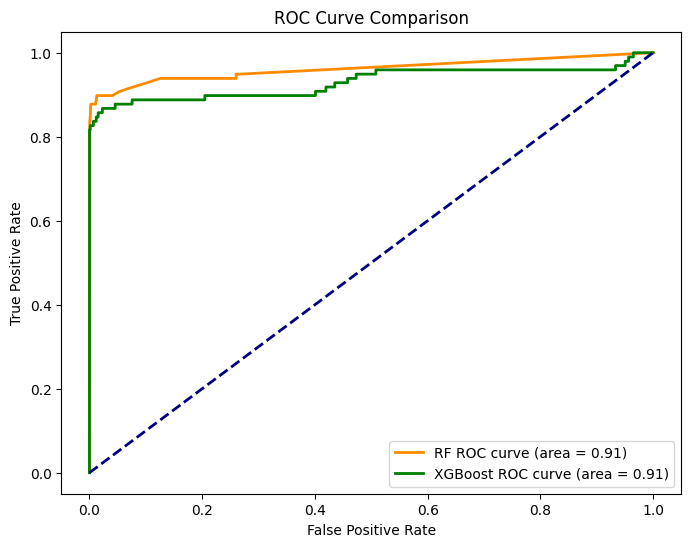

In [59]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'RF ROC curve (area = {roc_auc_best:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [60]:
# Alternative Model - Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)

In [61]:
# Logistic Regression Model Evaluation
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



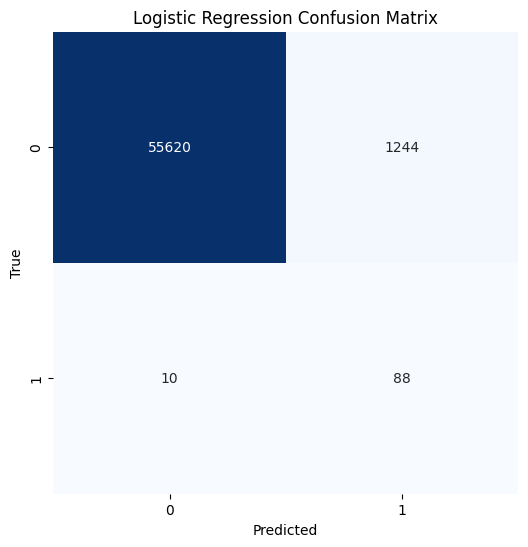

In [62]:
# Logistic Regression Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [63]:
# Compare Logistic Regression vs Random Forest vs XGBoost (ROC Curve)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

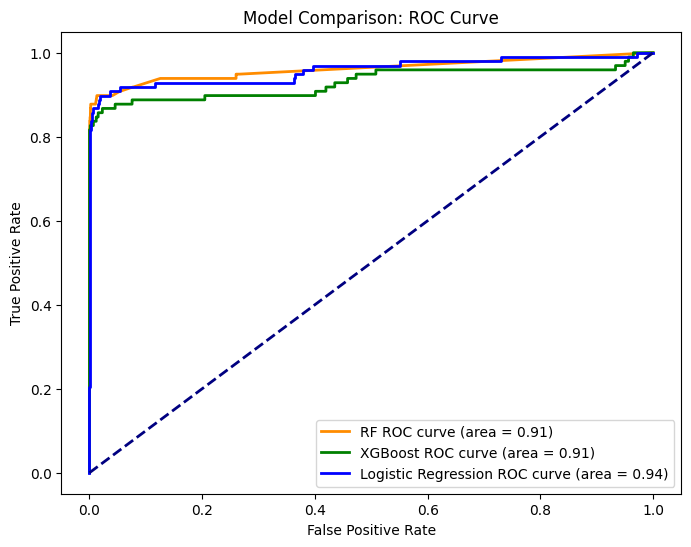

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'RF ROC curve (area = {roc_auc_best:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Comparison: ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
# Hyperparameter Tuning Logistic Regression (GridSearchCV)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(log_reg, param_grid=param_grid_lr, cv=3, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [66]:
# Best Parameters for Logistic Regression
print("Best Parameters (Logistic Regression):", grid_search_lr.best_params_)

Best Parameters (Logistic Regression): {'C': 1, 'solver': 'saga'}


In [67]:
# Re-training Logistic Regression with Best Parameters
best_log_reg = grid_search_lr.best_estimator_
best_log_reg.fit(X_train_res, y_train_res)
y_pred_best_lr = best_log_reg.predict(X_test)

In [68]:
# Logistic Regression - Final Evaluation
print(classification_report(y_test, y_pred_best_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [104]:
# Feature Engineering: Adding Interaction Features
df['V1_V2'] = df['V1'] * df['V2']
df['V3_V4'] = df['V3'] * df['V4']
# Add more features based on domain knowledge and intuition
df_new_features = df.drop(columns=['Time', 'Class'])

In [105]:
# Re-training with New Features
X_new = df_new_features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, df['Class'], test_size=0.2, random_state=42)
X_train_res_new, y_train_res_new = smote.fit_resample(X_train_new, y_train_new)
rf.fit(X_train_res_new, y_train_res_new)
y_pred_new = rf.predict(X_test_new)

In [106]:
# Re-evaluating Model with New Features
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [107]:
# ROC Curve with New Features
fpr_new, tpr_new, thresholds_new = roc_curve(y_test_new, rf.predict_proba(X_test_new)[:, 1])
roc_auc_new = roc_auc_score(y_test_new, y_pred_new)

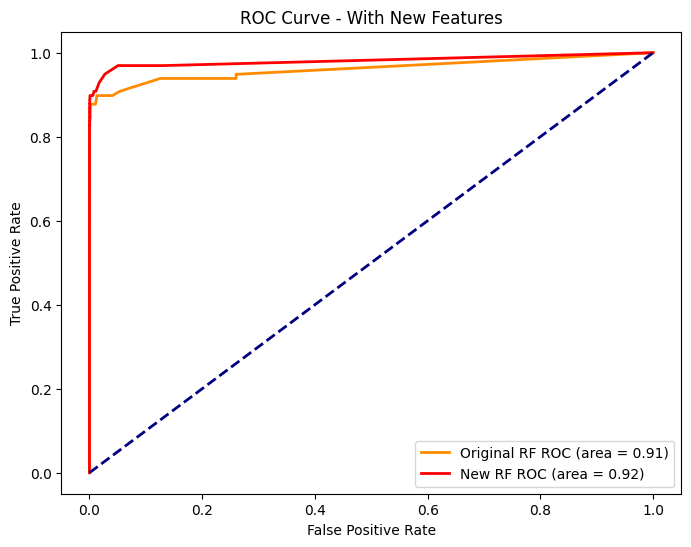

In [108]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'Original RF ROC (area = {roc_auc_best:.2f})')
plt.plot(fpr_new, tpr_new, color='red', lw=2, label=f'New RF ROC (area = {roc_auc_new:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - With New Features')
plt.legend(loc='lower right')
plt.show()

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight


# Compute class weights for 'y_train_res'
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weight_dict = dict(zip(np.unique(y_train_res), class_weights))

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
}

# Evaluate models using cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    print(f"{model_name} - Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Random Forest - Cross-Validation Accuracy: 0.9998 ± 0.0001
Logistic Regression - Cross-Validation Accuracy: 0.9289 ± 0.0009


In [119]:
# Save the Model and New Features for Future Use
joblib.dump(rf, 'fraud_detection_model_with_new_features.pkl')
df_new_features.to_csv('fraud_detection_with_new_features.csv', index=False)